In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter  # Importa FuncFormatter

In [3]:
df = pd.read_csv(r"C:\Users\Usuario\Desktop\Port Folio\Pandas y Matplotlib\Proyecto I+D UNO\Graf. 2\Datos CSV\punto_2_trigo.csv")
df.tail() # muestra la "cola" de la tabla, es decir,  final

,Ano,AreaCosechada,Produccion,Rendimiento
54,2015,24599116,132646335,53923.0
55,2016,24698345,133274638,53961.0
56,2017,24480542,134246679,54838.0
57,2018,24268721,131446596,54163.0
58,2019,23732560,133601131,56294.0


In [4]:
df["Rendimiento2"] = df["Produccion"]/df["AreaCosechada"]
df["Rendimiento2"] = df["Rendimiento2"]*10000



In [5]:
df["Rendimiento2"] = round(df["Rendimiento2"])

In [6]:
# Convertir la columna "Rendimiento2" a tipo de dato entero
df["Rendimiento2"] = df["Rendimiento2"].astype(int)

<Figure size 1600x800 with 0 Axes>

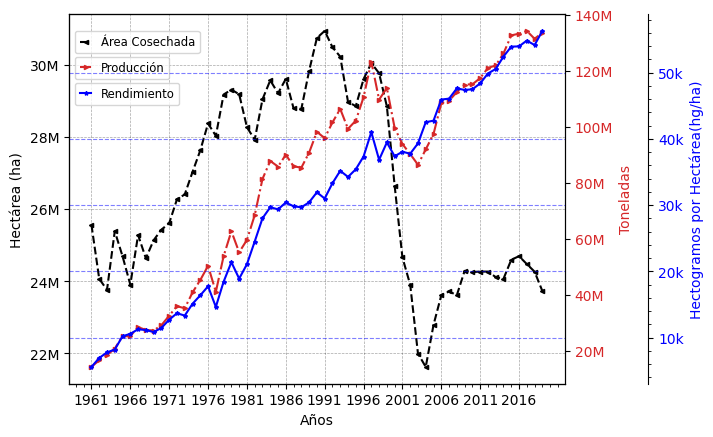

In [7]:
plt.figure(figsize=(16, 8))
def millions(x, pos):
    'El número 1 se representa como 1M'
    return f'{x/1e6:.0f}M'

def k(x, pos):
    'El número 1 se representa como 1M'
    return f'{x/1000:.0f}k'

# Crea un gráfico de líneas con tres ejes Y
fig, ax1 = plt.subplots()

# Eje Y 1
ax1.set_xlabel('Años')
ax1.set_ylabel('Hectárea (ha)', color='black')
ax1.plot(df['Ano'], df['AreaCosechada'], color='black', label='Área Cosechada', marker="<", markersize=3, linestyle = "--")
ax1.tick_params(axis='y', labelcolor='black')


# Eje Y 2
ax2 = ax1.twinx()
ax2.set_ylabel('Toneladas', color='tab:red')
ax2.plot(df['Ano'], df['Produccion'], color='tab:red', label='Producción', marker=">", markersize=3, linestyle = "-.")
ax2.tick_params(axis='y', labelcolor='tab:red')


# Eje Y 3
ax3 = ax1.twinx() # compartimos grafico con ax1 pero usamos otro eje
ax3.spines['right'].set_position(('outward', 60)) # spines se refiere a los bordes del área de trazado (spines) en el gráfico.
ax3.set_ylabel('Hectogramos por Hectárea(hg/ha)', color='blue')
ax3.plot(df['Ano'], df['Rendimiento2'], color='blue', label='Rendimiento', marker="*", markersize=3,linestyle = "-")
ax3.tick_params(axis='y', labelcolor='blue')

#activar leyenda con cuadro más pequeño
ax1.legend(loc='upper left', bbox_to_anchor=(0.001, 0.97), handlelength=1, fontsize='small')
ax2.legend(loc='upper left', bbox_to_anchor=(0.001, 0.90), handlelength=1, fontsize='small')
ax3.legend(loc='upper left', bbox_to_anchor=(0.001, 0.83), handlelength=1, fontsize='small')

#ax3.legend(loc='upper left')

# Configura el eje Y para mostrar los valores completos
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax2.yaxis.set_major_formatter(FuncFormatter(millions))
ax3.yaxis.set_major_formatter(FuncFormatter(k))

# Especificar el formato de los ticks del eje X para mostrar los años cada 10 años
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Establecer los ticks del eje X manualmente cada 10 años
plt.xticks(np.arange(1961, 2020, 5),fontsize=3)
#plt.yticks(np.arange(210000, 2020, 3))

#activar cuadricula 
#plt.grid()

# Activar la cuadrícula en el primer eje (ax1)
#ax1.grid(True, axis='y', linestyle='-', color='gray', alpha=0.5)
plt.grid(True, which='major', axis='both', color='blue', linestyle='--', linewidth=0.8, alpha=0.5)
ax1.grid(True, which='major', axis='both', color='black', linestyle='--', linewidth=0.5, alpha=0.35)
#ax2.grid(True, which='major', axis='both', color='red', linestyle='--', linewidth=0.5, alpha=0.3)
#activar marcas menores 

plt.minorticks_on()

#plt.title("Segun la FAO(1961-2019): Área cosechada, rendimiento y producción en China del Maiz")
plt.savefig(r'C:\Users\Usuario\Desktop\Port Folio\Pandas y Matplotlib\Proyecto I+D UNO\Graf. 2\Correcion\graf. linea trigo.png', dpi=300, bbox_inches='tight')
plt.show()